# WordNet embeddings
> Extending benchmarks to the WordNet experiment from the HoroRF paper

Source for data: https://drive.google.com/drive/folders/1PFVcSKnHfLJr9tbwvj5KQSUUMdDYBixZ

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from hyperdt.forest import 

# Explore WordNet data

(82114, 2)


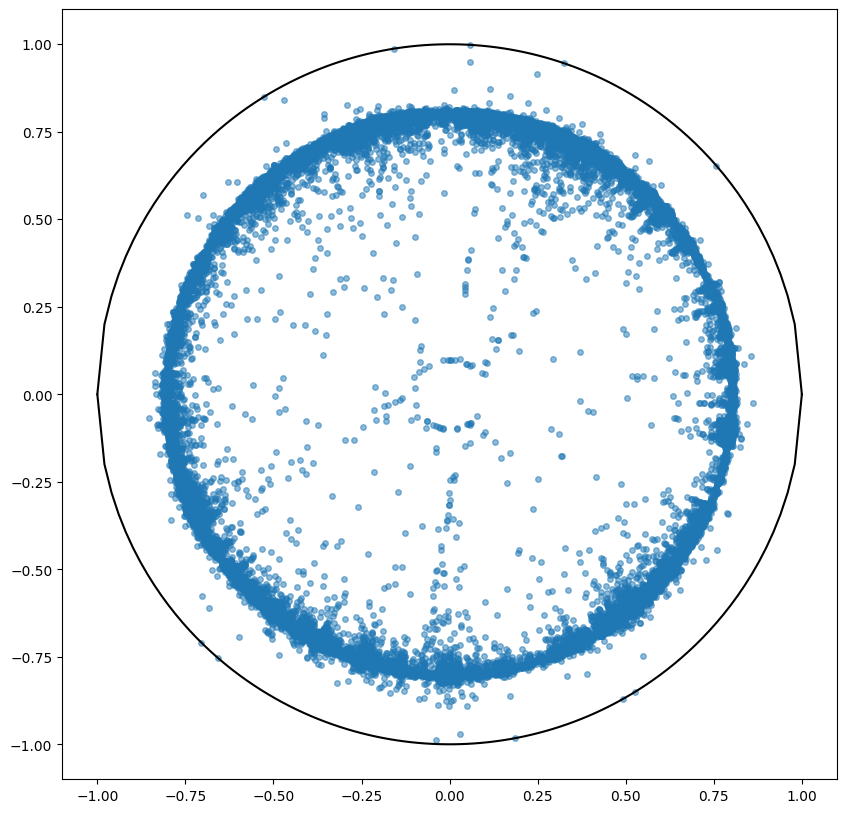

In [9]:
# First we load the embeddings

embeddings = np.load("../data/raw/wordnet/embeddings.npy")
print(embeddings.shape)

# Plot
fig = plt.figure(figsize=(10, 10))
_x = np.linspace(-1, 1, 100)
_y = np.sqrt(1 - _x**2)
plt.plot(_x, _y, c="k")
plt.plot(_x, -_y, c="k")
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=16, alpha=0.5)
plt.show()

In [18]:
# Let's see what's going on in the binary labels

binary_labels = {}
for category in ["animal", "group", "mammal", "occupation", "rodent", "solid", "tree", "worker"]:
    labels = np.load(f"../data/raw/wordnet/binary_wordnet/{category}_labels.npy")
    binary_labels[category] = labels
    print(category, labels.shape, np.unique(labels, return_counts=True)[1], sep="\t")

animal	(82114,)	[ 4016 78098]
group	(82114,)	[ 8376 73738]
mammal	(82114,)	[ 1181 80933]
occupation	(82114,)	[  283 81831]
rodent	(82114,)	[  138 81976]
solid	(82114,)	[ 1231 80883]
tree	(82114,)	[ 1014 81100]
worker	(82114,)	[ 1115 80999]


In [19]:
# Same for the multiclass labels

multiclass_labels = {}
for n in [1, 2, 3]:
    labels = np.load(f"../data/raw/wordnet/multiclass_wordnet/multi_labels{n}.npy")
    multiclass_labels[n] = labels
    print(n, labels.shape, np.unique(labels, return_counts=True)[1], sep="\t")

1	(82114,)	[79134   296  1181   871   632]
2	(82114,)	[35958 26565 15575  2835   958   223]
3	(82114,)	[74265  5227   799  1647   176]


# Binary WordNet classification

In [ ]:
# I updated the HoroRF dataloaders ('binary_wordnet.py') and ran this through hororf_benchmarks.py instead